In this noteboook, the geometry of cpw sections constituting a Bragg resonator are specified, and the transmission is siumulated and plotted. Parameters such as the Q factor can then be extracted.

In [1]:
import ResonatorOptimizer as ro
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')

In [2]:
# Global Parameters
__er = 11.9
__fo = 7.3e09
__h = 500e-06
__t = 50e-09
__pen_depth = 39e-09
__total_width = 43.6e-06
__length = 8102.64e-06
freq = np.linspace(2,12,30000)*1e09

__keyind = lambda X,X_array: min(enumerate(X_array), key=lambda x: abs(x[1]-X))

In [3]:
# Instantiate bragg class
br = ro.Bragg(__fo,__er,__h,__t,__pen_depth)

# Specify bragg sections
cav_width, cav_gap, cav_length = [21.6e-06, 11.1e-06, 8102.64e-06]
cavity = br.cpw_section(cav_width, cav_gap, cav_length)

lowZ_width, lowZ_gap, lowZ_length = [36.6e-06, 3.6e-06, 4091.32e-06]
lowZ = br.cpw_section(lowZ_width, lowZ_gap, lowZ_length)

highZ_width, highZ_gap, highZ_length = [7.8e-06, 18e-06, 3566.32e-06]
highZ = br.cpw_section(highZ_width, highZ_gap, highZ_length)

# Get S21 for the bragg resonator
bragg = br.bragg_resonator(freq,lowZ,highZ,cavity)

In [65]:
print(cavity.phase_velocity())
print(lowZ.phase_velocity())
print(highZ.phase_velocity())

116584558.46640207
117717328.91853052
102688189.00742765


In [4]:
# Get Bragg data for extracting Q
freq_nb = np.linspace(7.1954,7.1957,500)*1e09
bragg_nb = br.bragg_resonator(freq_nb,lowZ, highZ, cavity) # for Q

rofit = ro.ResonatorFitting()
fit = rofit.LorentzianFit(freq_nb,bragg_nb,plot=False)
Q = fit.Q.values[0]
f0 = fit.centre.values[0]*1e06

/Users/garethjones/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


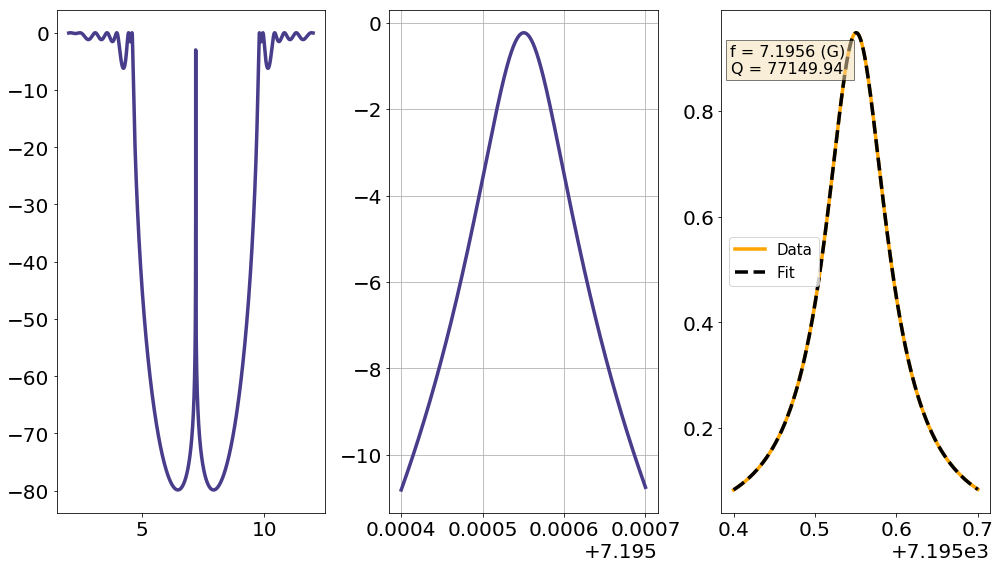

In [5]:
fig = plt.figure(figsize=(14,8))

ax0 = fig.add_subplot(131)
plt.plot(freq*1e-09,bragg,color = 'darkslateblue')

ax1 = fig.add_subplot(132)
plt.plot(freq_nb*1e-09,bragg_nb,color = 'darkslateblue')
plt.grid()

ax2 = fig.add_subplot(133)
plt.plot(fit.x,fit.y,color = 'orange', label = 'Data')
plt.plot(fit.x,fit.fit,'--',color = 'k',label = 'Fit')
plt.text(0.255, 0.9, 'f = {:.4f} (G) \nQ = {:.2f} '.format(f0*1e-09,Q), horizontalalignment='center',
     verticalalignment='center', transform=ax2.transAxes,fontsize=16,bbox=dict(facecolor='wheat', alpha=0.5))
plt.legend(loc='center left')

plt.tight_layout()
plt.show()

In [22]:
# Instantiate bragg class
br = ro.Bragg(__fo,__er,__h,__t,__pen_depth,no_mirrors=100)

# Get S21 for the bragg resonator
bragg_reflector = br.bragg_reflector_transmission(freq,lowZ,highZ)

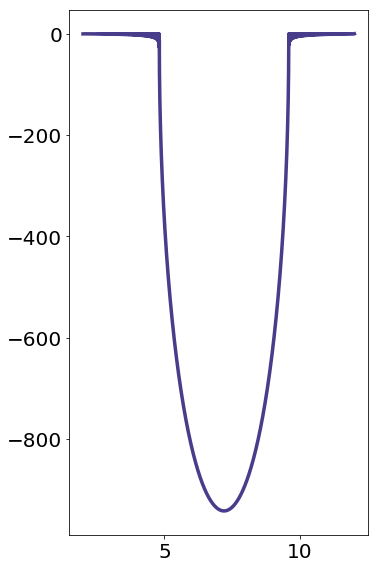

In [25]:
fig = plt.figure(figsize=(14,8))

ax0 = fig.add_subplot(131)
plt.plot(freq*1e-09,bragg_reflector,color = 'darkslateblue')

plt.tight_layout()
plt.show()

In [16]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

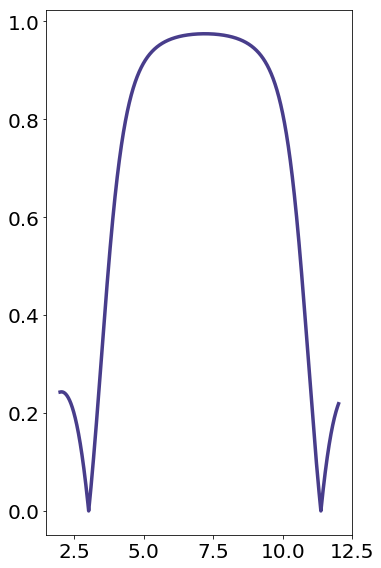

In [43]:
br = ro.Bragg(__fo,__er,__h,__t,__pen_depth,no_mirrors=1)
bragg_reflector = br.bragg_reflector_reflection(freq,lowZ,highZ)
bragg_reflector = abs(10**(bragg_reflector/20))

fig = plt.figure(figsize=(14,8))

ax0 = fig.add_subplot(131)
plt.plot(freq*1e-09,bragg_reflector,color = 'darkslateblue')

plt.tight_layout()
plt.show()

In [49]:
np.arange(0,5,1)

array([0, 1, 2, 3, 4])

In [50]:
no_mirrors = np.arange(0,5,1)

bragg_reflector = np.zeros((len(no_mirrors),len(freq)),dtype=float)

for i in range(len(no_mirrors)):
    br = ro.Bragg(__fo,__er,__h,__t,__pen_depth,no_mirrors=no_mirrors[i])
    bragg_reflector[i] = br.bragg_reflector_reflection(freq,lowZ,highZ)
    bragg_reflector[i] = abs(10**(bragg_reflector[i]/20))

# fig = plt.figure(figsize=(14,8))

# ax0 = fig.add_subplot(131)
# plt.plot(freq*1e-09,bragg_reflector,color = 'darkslateblue')

# plt.tight_layout()
# plt.show()

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


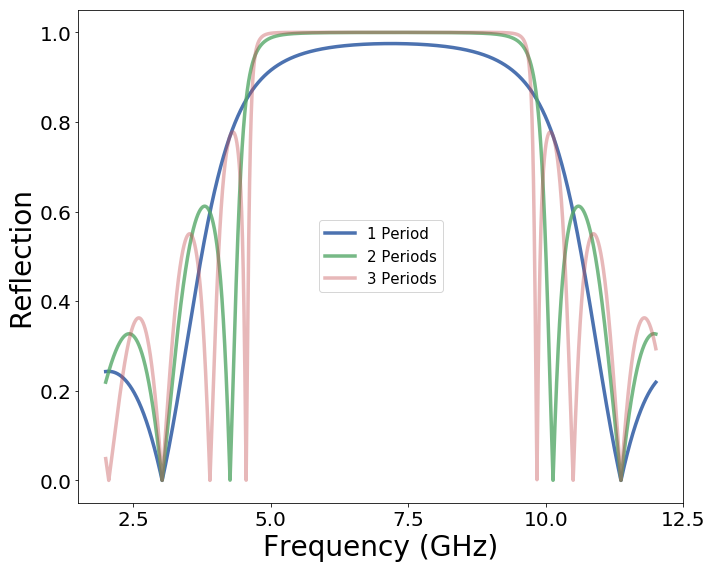

In [97]:
fig = plt.figure(figsize=(10,8))

# ax0 = fig.add_subplot(131)
# [plt.plot(freq*1e-09,bragg_reflector[i]) for i in range(len(no_mirrors))]
plt.plot(freq*1e-09,bragg_reflector[1],alpha=1,label='1 Period')
plt.plot(freq*1e-09,bragg_reflector[2],alpha=.8,label='2 Periods')
plt.plot(freq*1e-09,bragg_reflector[3],alpha=.4,label='3 Periods')
# plt.plot(freq*1e-09,bragg_reflector[4],alpha=.2)

plt.legend(loc='center')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Reflection')

plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
plt.savefig('Reflection.pdf',bbox_inches=None)
plt.show()

In [91]:
%%bash
ls /Users/garethjones/Documents/PhD_Files/QSD/

Experiments
Literature
Misc_Code
Project_Management
ResonatorDesigns
Simulation
Spin Abstract.docx
UpgradeReport
Writing&Presentations
XQ_Notebooks
__pycache__
cleanroom_pics
fabrication
gitlab
